# Project : Handwritten Digit Recognition
## Type : Multiclass Image Classification using Deep Learning
### Dataset : MNIST

## What is Handwritten Digit Recognition?
The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

## The MNIST dataset
This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

## S-1: Importing necessary dependecies

In [1]:
## Importing necessary Lib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
np.random.seed(42)  # for reproducibility

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
import keras

# import the library needed for one hot encoding
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import img_to_array, load_img

from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split, KFold

## Load image data from MNIST
from keras.datasets import mnist

## S-2: Preprocess the data
The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [2]:
## Loading our dataset and to get train valid and test dataset

def load_dataset():

    (X_train, Y_train), (x_test, y_test) = mnist.load_data()

    ## Spliting the traing dataset into traing and validation

    x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 77)
    # The number of training and testing images present in the dataset
    print('There are %d training images.' % len(x_train))
    print('There are %d valid images.' % len(x_valid))
    print('There are %d testing images.' % len(x_test))

    # printing shape of training dataset
    print('Shape of training, validation and test dataset before reshaping:', x_train.shape, x_valid.shape, x_test.shape) 

    print("Number of Train labels:",len(np.unique(y_train)))

    # unique values in y_train, y_valid and y_test
    print(np.unique(y_train))
    print(np.unique(y_valid))
    print(np.unique(y_test))

    # Reshape to be samples*pixels*width*height
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

    # Printing the new dimensions
    print('Shape of training, validation and test dataset after reshaping:', x_train.shape, x_valid.shape, x_test.shape)

    # One hot Code
    y_train = np_utils.to_categorical(y_train)
    y_valid = np_utils.to_categorical(y_valid)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]

    # normalize the pixel value to range [0, 1]
    x_train = (x_train / 255.0)
    x_valid = (x_valid / 255.0)
    x_test = (x_test / 255.0)

    return x_train, y_train, x_valid, y_valid, x_test, y_test

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_dataset()

11490434/11490434 [==============================] - 1s 0us/step
There are 42000 training images.
There are 18000 valid images.
There are 10000 testing images.
Shape of training, validation and test dataset before reshaping: (42000, 28, 28) (18000, 28, 28) (10000, 28, 28)
Number of Train labels: 10
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
Shape of training, validation and test dataset after reshaping: (42000, 28, 28, 1) (18000, 28, 28, 1) (10000, 28, 28, 1)


## S-3: Model Building
- Now we will create our CNN model. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adam optimizer.
- API: Sequential (Linear)

In [4]:
## Creating Model
def create_model():
  model_hr = Sequential(
      [
      Conv2D(
          32,
          kernel_size=(5, 5),
          padding="same",
          activation="relu",
          input_shape=(28, 28, 1),
      ),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, kernel_size=(5, 5), padding="same", activation="relu"),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.25),
      Flatten(),
      Dense(128, activation="relu"),
      Dropout(0.3),
      Dense(64, activation="relu"),
      Dropout(0.5),
      Dense(10, activation="softmax"),
      ]
      )
  # Print the model summary
  model_hr.summary()

  # Compile model
  model_hr.compile(
      optimizer= Adam(),
      loss='categorical_crossentropy',
      metrics=["accuracy"]
  )
  return model_hr

In [5]:
# Define model
model_cnn = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

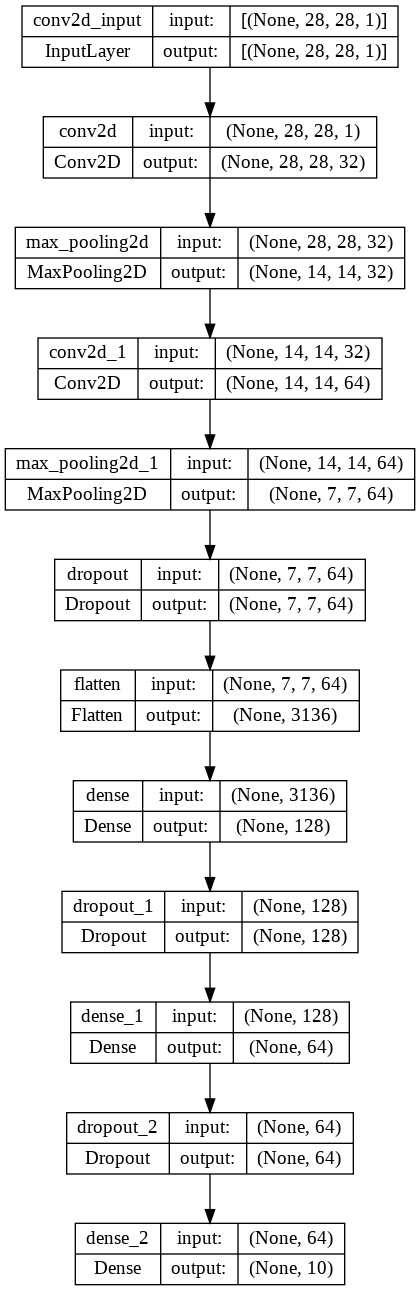

In [6]:
## Plot graph
plot_model(model_cnn, to_file='MNIST.png', show_shapes=True, show_layer_names=True)

In [7]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, y_test.shape

((42000, 28, 28, 1), (42000, 10), (18000, 28, 28, 1), (18000, 10), (10000, 10))

In [8]:
## Fit model 
def fitModel(model, x_train,y_train , x_valid,y_valid):
  history = model.fit(
  x_train,
  y_train,
  batch_size=128,
  epochs=20,
  validation_data=(x_valid, y_valid),
  verbose = 1)
  print("The model has successfully trained")
  return history

In [9]:
model_history = fitModel(model_cnn, x_train,y_train , x_valid,y_valid)

Epoch 1/20
329/329 [==============================] - 11s 8ms/step - loss: 0.4581 - accuracy: 0.8578 - val_loss: 0.0897 - val_accuracy: 0.9742
Epoch 2/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1352 - accuracy: 0.9640 - val_loss: 0.0636 - val_accuracy: 0.9799
Epoch 3/20
329/329 [==============================] - 3s 8ms/step - loss: 0.0936 - accuracy: 0.9763 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0728 - accuracy: 0.9807 - val_loss: 0.0446 - val_accuracy: 0.9871
Epoch 5/20
329/329 [==============================] - 3s 8ms/step - loss: 0.0623 - accuracy: 0.9846 - val_loss: 0.0379 - val_accuracy: 0.9889
Epoch 6/20
329/329 [==============================] - 3s 8ms/step - loss: 0.0527 - accuracy: 0.9862 - val_loss: 0.0412 - val_accuracy: 0.9894
Epoch 7/20
329/329 [==============================] - 3s 8ms/step - loss: 0.0469 - accuracy: 0.9875 - val_loss: 0.0413 - val_accuracy: 0.9896
Epoch

In [10]:
## Save Model
def save_model(model):
  model.save('mnist.h5')
  print("Saving the model as mnist.h5")

In [11]:
save_model(model_cnn)

Saving the model as mnist.h5


In [12]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

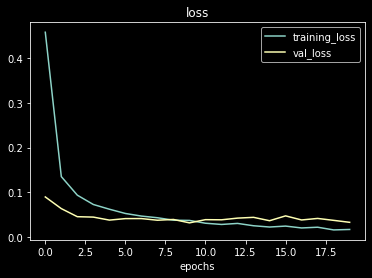

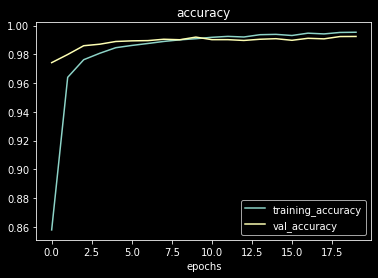

In [13]:
# Check out the loss and accuracy of model_1
plot_loss_curves(model_history)

In [14]:
## Evaluate Model
def test_results(model,X, y):

  score = model.evaluate(X, y, verbose=1)
  # Create a dictionary of model results
  print('Test_loss:', score[0])
  print('Test_accuracy:', score[1])
  

In [15]:
test_results(model_cnn,x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9926
Test_loss: 0.03170876204967499
Test_accuracy: 0.9926000237464905


In [16]:
## Prediction
def predict_digit(path):

  ## Loading the model
  final_model = load_model('mnist.h5')
  img = load_img(path)
  #resize image to 28x28 pixels
  img = img.resize((28,28))
  #convert rgb to grayscale
  img = img.convert('L')
  img = np.array(img)
  #reshaping to support our model input and normalizing
  img = img.reshape(1,28,28,1).astype('float32')
  img = img/255.0
  #predicting the class
  res = final_model.predict([img])[0]
  return np.argmax(res), max(res)

In [17]:
input_image_path = input('Path of the image to be predicted: ')
a, b = predict_digit(input_image_path)
print('Predicted Digit is: {}'.format(a))
print('Maximum Probablity: {}'.format(b))

Path of the image to be predicted: /content/7.png
1/1 [==============================] - 0s 120ms/step
Predicted Digit is: 7
Maximum Probablity: 0.9994983673095703


## Final Comments:
- We have achieved almost 99% accuracy and model is not overfitting